In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [12]:
# Load the data
# 1 Publisher
broker_1pub_df = pd.read_csv('csv/broker_1pub_output.csv')
# 5 Publishers
broker_5pub_df = pd.read_csv('csv/broker_5pub_output.csv')
# 8 Publishers
broker_8pub_df = pd.read_csv('csv/broker_8pub_output.csv')
# 10 Publishers
broker_10pub_df = pd.read_csv('csv/broker_10pub_output.csv')
# 14 Publishers
broker_14pub_df = pd.read_csv('csv/broker_14pub_output.csv')

In [13]:
broker_5pub_df.head()

,topic,content,publisher_id,timestamp,latency
0,sound,30,pub3,2023-02-12T12:25:20,-22.322577
1,airquality,poor,pub3,2023-02-12T12:25:20,-18.219601
2,sound,55,pub3,2023-02-12T12:25:20,-17.209015
3,airquality,good,pub3,2023-02-12T12:25:20,-12.583776
4,sound,52,pub3,2023-02-12T12:25:20,-11.548024


In [19]:
# Build the list of latency values
latencyList = [broker_1pub_df['latency'], broker_5pub_df['latency'],
              broker_8pub_df['latency'], broker_10pub_df['latency'], broker_14pub_df['latency']]



In [20]:
# latencyList

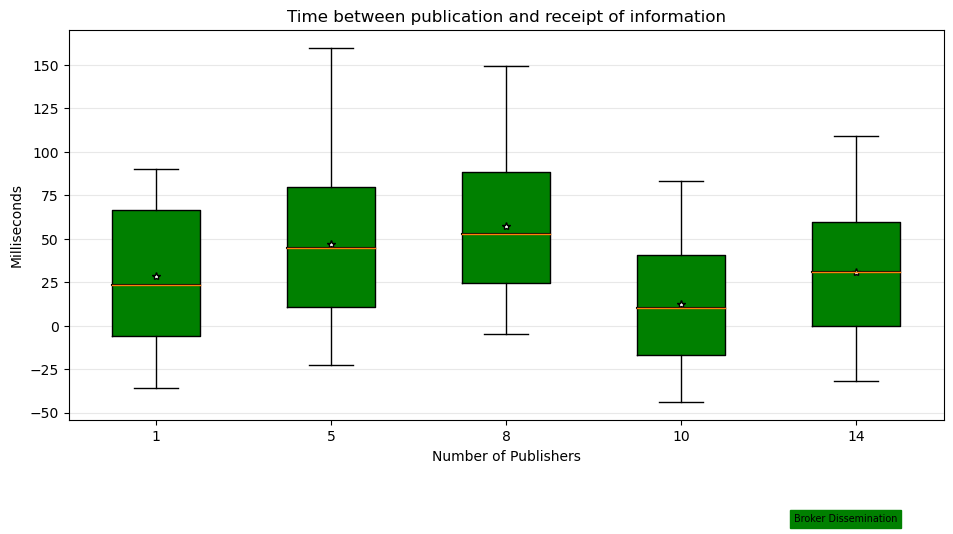

In [22]:
# Build X axis labels
# LOGIC TAKEN FROM https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
labels = ['1', '5', '8', '10', '14']

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(latencyList, notch=False, sym='+', vert=True, whis=1.5, labels=labels)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Time between publication and receipt of information',
    xlabel='Number of Publishers',
    ylabel='Milliseconds',
)

box_colors = ['green']
num_boxes = len(latencyList)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 1]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(latencyList[i]),
             color='w', marker='*', markeredgecolor='k')
    
fig.text(0.80, 0.08, 'Broker Dissemination',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')

plt.show()